# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

No, the smartcab doesn't move at all during the simulation. This indicates that it isn't very smart, since a smartcab would do something smart, something like not impeding traffic. 

The driving agent recieves rewards of type float. They are both positive and negative. 

Since the agent is idling at a light, it is either obeying the law (not moving at a red) or impeding traffic (idling at green). When obeying the law, the rewards are usually in the range of (0 - 3). When the agent breaks the law by impeding traffic and not moving on green, the agent is rewarded with negative numbers, usually in the range (-6, -4).

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

Flags explanations

update_delay: This flag changes how long the simulation pauses for between each action. This is useful if a human user wants to monitor what the smartcab is doing and the rewards it's getting in real time. If there was no delay, the human user would never be able to keep up and would have to rely on post-learning statistics to know what happened. 

display: This flag turns off and on the colorful display. The display is useful because it shows in green and red color whether the reward is positive or negative. It also shows the trial number. Observing the changing display can give more information to a human user, since the colors and large font are easier to decipher than the terminal messages. It can also help a human user see how the car is making progress throughout the simulation. 

n_test: The number of times the agent attempts to get to a destination. The more tests we have, the more confidence we'll have about how well our agent performs. (If he fails once and suceeeds once, we're not as confident in saying he suceeds 50% of the time, but if he succeeds 50/100 times, then we're more confident in the properties of our agent). 

Environment Class Function
The "act" function is called. When the agent calls the update method, it figures out the best choice for itself and then acts on the environment. 

Renderers
render_text() writes the text to terminal output. render() writes the text to the gui output. 

next_waypoint considers East-West first, as seen by the control flow in the if statement. 

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


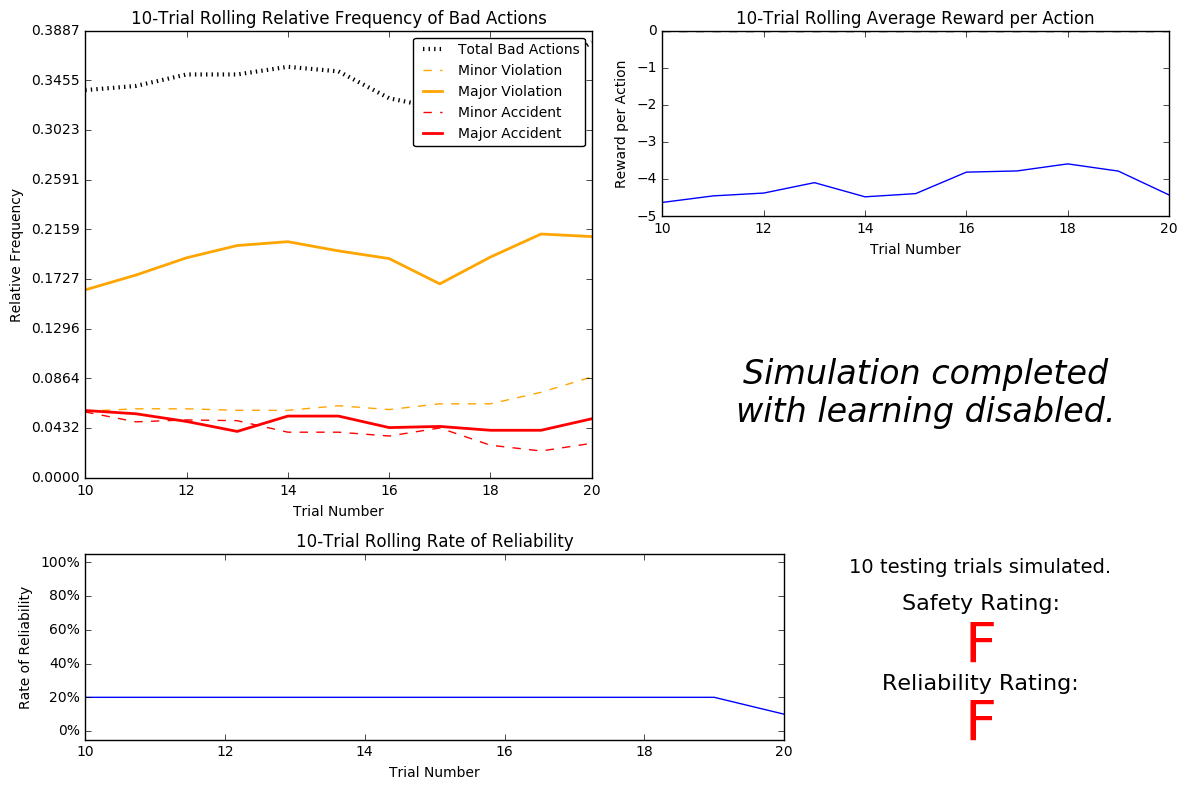

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

The driving agent makes bad decisions around 35% of the time. Combining major and minor accidents, they happen around 10% of the time in total, so 10/35, which is a little less than 30%. So, 3/10 times the car makes a bad decision, it ends in an accident, and it makes bad decisions around 7/20 times. 

Since the agent is driving randomly, the reliability does make sense. We can't rely on the agent to get to its destination because it chooses direction randomly, instead of towards the goal. 

The agent is getting a different set of rewards at this point. Since the agent might drive through during crosstraffic, the rewards are proportionately larger - accidents are more serious than holding up traffic. A quick scan through the log file showed that some rewards were as low as -40, which is pretty rough, though a lot were near -10. Correct actions usually gave rewards that were very small, close to 1 or 2. Since major accidents even by random chance don't happen too often, our average reward isn't massively negative, but closer to -5 and -4. Also, negative reinforcements are usually stronger than positive ones. So even if the agent made a few more good decisions than bad ones, the average reward would be negative - up to a point. 

The outcomes don't vary significantly. As the trial number increases, the accident and infraction percentages change randomly but don't change very much. Ie, noise. We can see that if we were to plot some sort of regression, we would get a line with a slope close to zero. 

This smartcab is not safe. Randomly making decisions means that it may randomly enter crosstraffic and cause major accidents. Hence, we can see the cause for an "F" in safety. The cab also isn't reliable. The rolling rate of reliability shows a pretty consistent low rate of reliability. The only reason the car gets to the destination is by random chance. Hence, there is no guarantee that the car will get to it's destination. This is why an F is awarded to reliability as well. In a different sense of the word, the car probably will reliably get you a one way ticket to the ER - or the morgue. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

** Addendum for Resubmission **
As mentioned below, we ignore the left car for reasons that are similar to ignoring the right car, but I forgot about the law where left cars can cross and our car can legally take a right assuming there are no left cars going straight. However, to keep the the number of states small, it felt like a good idea to omit the input from traffic on the left.

**Answer:**

Lets discuss safety. The lights are most important. The car needs to learn to avoid the major cross-traffic collisions, and lights are the main way to determine this. The oncoming value is important when the car wants to make a left turn so that the car can train to avoid making left turns when there is oncoming traffic and a green light. The car on the right shouldn't influence safety at all. There is no case where the input of the right car matters to the agent when the agent already knows the light status. If the light is green, the agent has right of way, and if the light is red, there's no way for the agent to collide with the car on the right, unless the agent disobeys the lights. Hence, we don't need to know the 'right' car input. The left car input should also be ignored for similar reasons. (In real life, we shouldn't ignore them because in real life, people might run a red, or turn right when they don't have the right of way, but in this simulation I'm assuming that all the cars strictly obey driving laws). The deadline shouldn't affect safety at all either - we don't care if we're 2 hours behind schedule, we're not running a red to shave off a few seconds. Waypoint is also not important to safety, since the goal of driving safely has nothing to do with a destination. 

In short, for safety, we need to know: 'lights', 'oncoming'. 

For efficiency, we need to know the waypoint, otherwise we'd never get there if we never knew which direction to go in. The deadline also isn't important, because our waypoint algorithm is already optimized for the fastest route, and so a deadline input won't help us at all. 

In total, we need three inputs: 'lights', 'oncoming', 'waypoint'. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Addendum for Resubmission**

It was realized that the car would never get a "backwards" waypoint. Hence, our state space really only has 24 possible states. I don't think it to be very likely that the agent will learn a policy for each possible state. The reason being that some states don't make sense, for instance, a state where the lights are green, and the oncoming car has action 'None', regardless of the agent's waypoint. Hence, we could look for those 3 states after running out simulation to see what policies were built up, and whether there even is a policy for those states. 

**Answer:**The size of our state space would be 2 x 4 x 4. (2 lights, times 4 choices for oncoming traffic, times 4 waypoints). Hence, we have 32 possible states. 

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

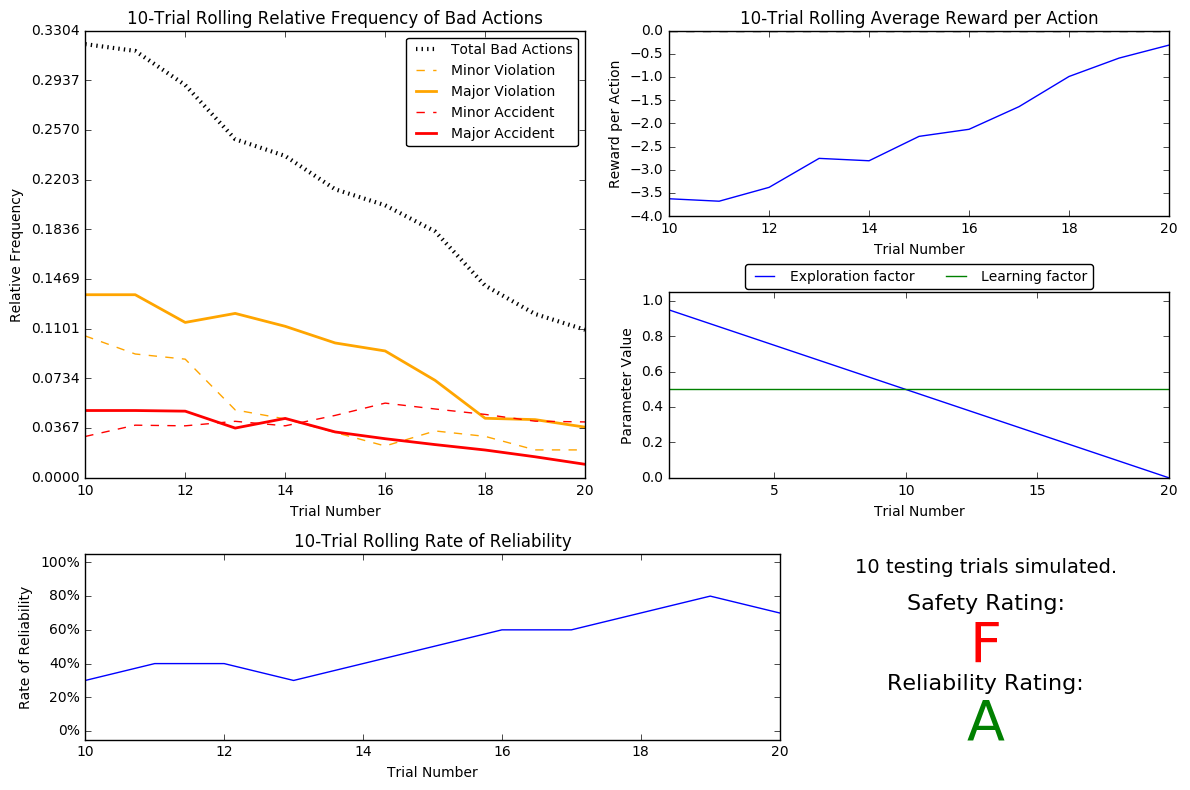

In [15]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Addendum for Resubmission: **
Our rewards seem to keep growing, and they don't plateau. This indicates that  more learning could potentially give the agent better average rewards. 

Now that I "think" I understand the concept of epsilon greedy (and realize that it's not just a weird counter for how many trials we should do)

As before, the reliability increases and seems to be pretty consistent but the safety looks to be shot. The car is reliable in terms of getting to it's destination, but for some reason the safety suffers. Granted, it doesn't take much for the safety to be an F, we only need one major accident, but the main thing I'd want to look into is why the agent isn't learning to avoid major accidents. We need some way to force the agent to acknowledge that major accidents are majorly important. I think the main reason that the agent doesn't learn to be super safe is that major accidents don't happen too often, and when they do, our learning rate of 0.5 might negate their importance when calculating rewards. Which means that we need to make alpha larger to place importance on the times when we do crash, so that the agent only ever needs one or two major crashes to help it avoid other crashes. 

**Answer:**
There's almost nothing similar between the basic driving agent and the default Q-Learning agent. In the rolling relative frequency of bad actions, the rate drops quickly in the Q learner while in basic mode, the car doesn't change it's rate very much. In the rate of reliability, the rate grows for the Q learner, while the basic car stays consistently low. The average reward per action for the Q learner grows until plateuing near 1.5 while the basic car gets an average of -4 reward per action and the only changes are small and can be attributed to random noise. The learning graph is the most different, since the Q learner... learns while the basic car didn't learn. We can see how as the number of trials increase, the learner explores less and less, but still learns at a constant rate. 

The Q learner required 20 trials, and this makes sense because 0.05 * 20 = 1, which is what epsilon starts out as. 

Yes, the decaying function is accurately represented in the exploration factor line. We see it linearly decreases until it hits 0. The alpha value stays at 0.5, as expected. 

In short, yes. The most drastic changes were between 10 to 14 trials where the slope was the largest. After trial 14, there is improvement, but it shows refinement more than drastic policy changes. The bad actions along with all consequences of the bad actions decreased (almost monotonically). The same can be said for the average rewards per trial. 

The safety and reliability improved drastically. We went from an agent that was best suited to driving away customers to an agent that shows the highest possible achievements in reliability and safety, at least as defined by our metrics. 

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

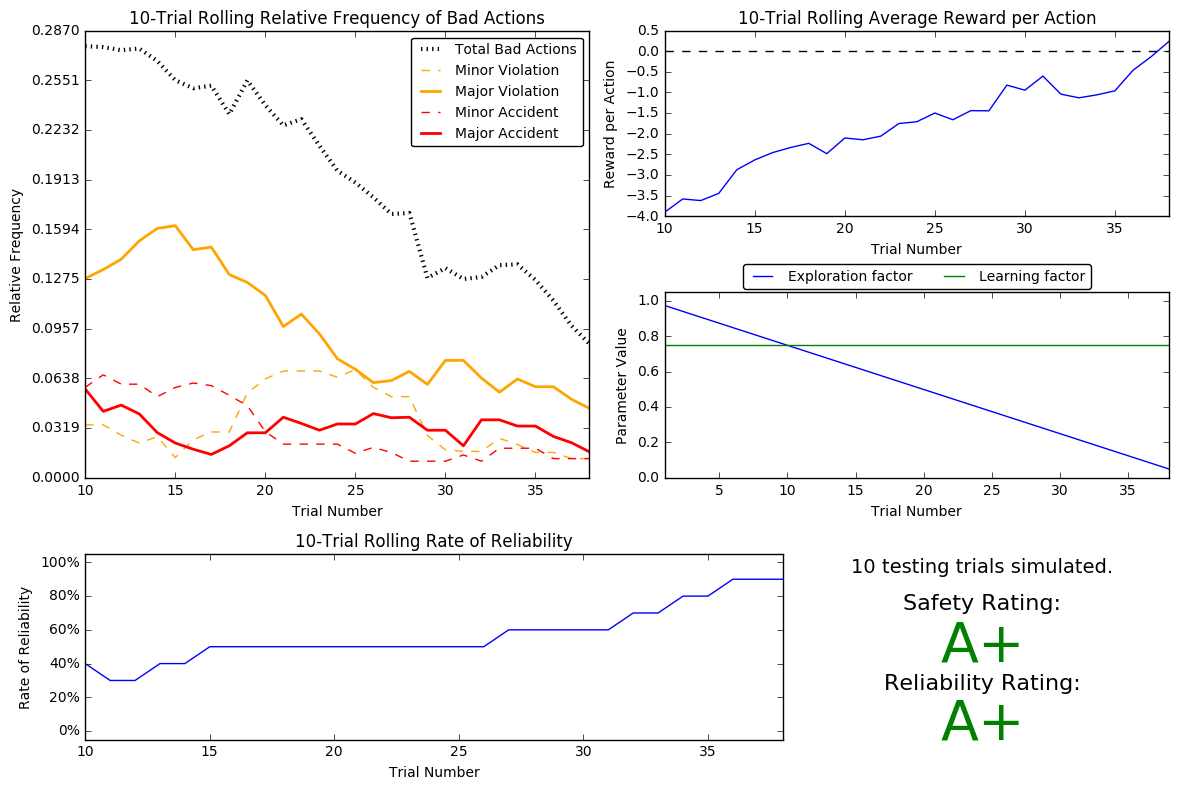

In [53]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

** Addendum for Resubmission **
This time around, it was easier to reason about what factors we should change and how. Since the accident rate was decreasing in the "regular" Q-learning, it made sense to let the learner train for longer to help it plateau and reach some kind of convergence. I stuck to a linear model as a starting choice, and halved the deprecation value. At the same time, it felt important to change the learning rate. While accidents are far and few, when they do happen, we want to force the learner to consider them as very important. The reason I believe this should work is that since a crash usually has very high negative rewards, and crash-free moves don't have as high of a reward. So, assuming the agent crashed once, it would remember that event more strongly than when it takes the same action in the same state and passes through without a crash. Hence, we set alpha to numbers in the range [0.70, 1.00] and epsilon to between 0.05 and 0.025. The numbers 0.75 for alpha and 0.025 for epsilon seemed to give pretty consistent results for both safety and reliability. Our car almost always scored A's and A+'s, and we were pretty confident in the ability of our Q learner to correctly learn the data. 

There was a significant improvement since we let our learner train for longer and since the environment seems to be more deterministic, we also set the alpha value higher. 

I am satisfied with these results. They are consistent, and satisfactory for the purposes of the agent. 

**Answer:**

First change: Turn off display, turn on optimizations, change the number of tests to 50. 
This goal of this change was to not change the learning at all (save for optimizations) and then increase the number of tests to 50 so that we can be more confident in our car safety and reliability rating. Also, turn display off since we can see the results here. 

Result: This was odd, because sometimes, we'd get fantastic results (A+, A) and other times, we'd get terrible results (F, D). And this is running the same simulation. Something about the learning needs to change to make the results on the tests more consistent. We could try increasing the number of tests to see if there is some kind of average grade that emerges, but first we'll twiddle with some parameters. 

Second change: change alpha and see if it makes a difference. 
Result: No matter how we changed the learning rate, the results always were inconsistent. Whether alpha was 0.75, 0.65, or even 0.25, we would get results as if determined by random. Sometimes the car would get an (A+, A), and other times even F's. (Granted, A's and B's came up much more often when doing the manual gridsearch). 

Third change: Try to change the learning epsilon decay function so that the learner learns for longer. 
This change seemed to work. We changed the decay function so that the smartcab learned over 40 trials instead of 20, and we ran 50 tests. The cab consistently gets an A+ in safety with varying success with reliability, usually not going below an A. A final run with 500 tests confirmed that we probably have a learner that consistently scores well on reliability and safety. 

A linear decaying function was used. for the exploration factor. Other functions seemed cool and interesting, but added a degree to the problem that I didn't really want to deal with. All I knew is that because I was getting inconsistent results, I probably needed to train for a little longer. Hence, I halved the step for the linear deprecation to double the number of training trials. When trying to work with the alpha, changing it seemed to have no consistent effect on the grade. The different values all "worked" but not reliably. 

It doesn't seem like there has actually been any improvement... after all the reliability has been reduced from an A+ to an A. The only thing we can really say is that since I didn't run the basic Q-learner multiple times, it probably doesn't always given (A+, A+). Hence, what we can say is that the improvement shows a more consistent testing score. When we train the agent for double the time, we get an A+ in safety, and this is likely because the algo had enough time to fill all 32 states with optimal values. 

Yes, by the increased number of tests (from 10 to 500) I'd say that our new Q-Learner has successfully learned a good policy that will reliably get it to it's destination safely. 

Well, yes and no. I'm not 100% sure if the test is set up to always give the smartcab enough time to get to it's destination. As in, the cab could always make the right choice, but it still wouldn't be able to get to it's destination on time. The reason for this is, that invariably in some of the tests, the destination could be further away. Also, there could be an unfortunate string of traffic lights that make the agent idle - for a long time. Since the lights aren't systematic and are random, it seems that this is an issue of the simulation rather than the the Q-Learning algorithm itself. However, what is more likely is that since I wanted to keep the state space small, I didn't realize that the agent could take a right turn, as long as there was no left car that was moving forward. This would definitely increase the number of states, (from 32 to 128 since a left car would have 4 possible actions. We could try this to improve reliability so that the agent can make right turns when the light is red and the car on the left isn't going forward. So, the next change is to improve the state by adding in the value of the "left" car. 

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
We'd expect that whenever there is a red light for there to be negative values for all choices except for 'None', since we don't want our car to attempt anything through the red lights. As well, for all situations when we can follow the waypoint and it's legal, we should, for instance when the waypoint is "right" and the lights are green, regardless of oncoming traffic direction. 

The odd thing that was seen in the Q-Learning algo's file was that this wasn't exactly the case. I would have expected negative rewards for doing anything other than Nothing when the light was red but all actions had a "0" expected reward, except for moving in the direction of the waypoint which had a very negative value since it would then be disobeying the light. The rationale could be that since disobeying the light had such high negative consequences, it learned those values first but then forgot about them later on as everything converged to final values. And the way it's set up, the "none" action is first within any given set of actions. I still am not sure why the illegal actions converged to zero, however. A similar observation is true for almost all other states, they'll have two or more actions with 0 reward. The best example of what I expected to happen is this state: 

('green', 'left', 'forward')
 -- forward : 0.00
 -- right : -0.02
 -- None : -0.14
 -- left : -0.05
 
 here, the lights are green, the oncoming traffic is going left and the waypoint is forward. Doing nothing is the highest penalized, while taking left and right turns is penalized for not following the waypoint. The only action that isn't penalized is the one that goes forward, towards the waypoint and follows the rules of the lights. 


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

I think it is because the environment is deterministic. At any given point, there is a best action, and the immediate reward that maximzes that value is the option we should take. For instance, the algorithm can be greedy and it will work effectively since the highest reward for that state is the correct one. It isn't ever the case that a choice that has a lesser instant reward will produce greater rewards down the line. Hence, there is no need to worry about future rewards, we just need to learn the best thing to do in the present. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.